# State Value Function

Next we will find different ways to compute the Value function given by a stochastic policy $\pi(s) = p(a\mid s)$.
We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
Here, we draw an Markov Decision Process (MDP) with three states $\mathcal{S}=\{s_1,s_2,s_3\}$ and three possible actions $\mathcal{A}=\{a_1,a_2,a_3\}$, moving to state $s_1$, moving to state $s_2$ and moving to state $s_3$.
![mdp.png](mdp.png)

# 6.1 Policy Evaluation by Dynamic Programming

For the MDP represented above we define the state transition probability matrix $\mathcal{P}^a_{ss'}=p(S_{t+1}=s'\mid S_{t}=s, A_t=a)$. In this MDP we assume that when we choose to move to state $s_i$, $i=\{1,2,3\}$ we always end up in that state, meaning that $\mathcal{P}^a_{ss'}=p(S_{t+1}=s'\mid S_{t}=s, A_t=a)=1$. In this case, $\mathcal{P}^{\pi}=\mathcal{P}^a_{ss'}\pi(a\mid s) = \pi(a\mid s)$ the Bellman Expectation equation becomes (Check page 14 and 16 from the lecture slides.):
$$
V_{\pi}(s) = \sum_{a\in\mathcal{A}} \pi(a\mid s)\left( \mathcal{R}^a_s + \gamma \sum_{s'\in \mathcal{S}}\mathcal{P}^a_{ss'}V_{\pi}(s')\right) = \mathcal{R}^{\pi}+ \gamma \sum_{s'\in \mathcal{S}}\pi(a\mid s)V_{\pi}(s')
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np

policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
# 'raw_rewards' variable contains rewards obtained after transition to each state
# In our example it doesn't depend on source state
raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
# 'rewards' variable contains expected values of the next reward for each state
rewards = np.matmul(policy, raw_rewards)
assert np.allclose(rewards, np.array([10., 2., 3.]))

state_value_function=np.array([0 for i in range(3)])

for i in range(20):
    print(state_value_function)
    
    state_value_function = rewards + 0.1 * (np.matmul(policy, state_value_function))
print(state_value_function)

[0 0 0]
[10.  2.  3.]
[10.49  2.61  3.85]
[10.5594  2.6674  3.9038]
[10.56532   2.673704  3.910464]
[10.56595688  2.6743188   3.91106728]
[10.56601845  2.67438127  3.91113041]
[10.5660247   2.67438748  3.91113659]
[10.56602532  2.6743881   3.91113722]
[10.56602538  2.67438816  3.91113728]
[10.56602539  2.67438817  3.91113728]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]


# 6.1 Policy Evaluation by Linear Programming
The state-value-function can be directly solved through linear programming (as shown on page 15 from the lecture slides):
$$
V_{\pi}(s)=\left(I-\gamma\mathcal{P}^{\pi}\right)^{-1}\mathcal{R}^{\pi}
$$

In [3]:
solution = np.matmul(np.linalg.inv(np.eye(3)-0.1*policy), rewards)
print(solution)

[10.56602539  2.67438817  3.91113729]


The result should stay the same.

# 6.2 Monte Carlo Policy Evaluation

We can design yet another way of evaluating the value of a given policy $\pi$, see lecture slides pag.20.
The intuition is to incrementally the expected return from sampled episodes, sequences of triplets $\{(s_i,a_i,r_{i})\}_{i=1}^N$. The function $\color{blue}{gt}$ computes the total discounted reward from a list of sequential rewards obtained by sampling the policy over N time-steps: $G_t=r_t+\gamma r_{t+1}+\gamma^2 r_{t+2}+\dots+\gamma^N r_{t+N}$.

The value of a policy can also be computed by looking at its empirical expected total discounted reward:
$$
V_{\pi}(s) = \mathbb{E}_{\pi}\left[G_t\mid S_t=s\right]
$$

In [12]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    total_disc_return = 0
    for (i, value) in enumerate(rewardlist):
        total_disc_return += (gamma ** i) * value
    return total_disc_return


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            #break #if break: return following only the first visit

print(reward_counter/visit_counter)

[10.56106724  2.66864832  3.90637674]


As can be seen the result is nearly the same as the state-value-function calculated above.

So far we have seen different ways of given a known policy $\pi(a\mid s)$ how to comput its value $V_{\pi}(s)$. Next, we wish to find the optimal policy $\pi^\ast(s)$ for the MDP in the example.

# 6.3 Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculates the optimal action-value-function (page 26 on slides).

It samples a state-action pair randomly, so that all state-action pairs can be seen, and updates the matrix of Q-values (expected discounted reward under the policy), for each state-action pair $\mathbf{Q[s_t, a_t] = (1-\alpha)\ Q[s_t, a_t] + \alpha \left( r_t + \gamma \max\limits_{a} Q[s_{t+1}, a]\right)}$ since we are in the tabular case--- where states and action are finite.

In [16]:
import random
q_table = np.zeros((3, 3)) #state action value function Q-table
gamma = 0.1
alpha = 0.01
for i in range(1001):
    state = random.randint(0, 2)
    action = random.randint(0, 2)
    next_state = action
    reward = raw_rewards[next_state]
    next_q = max(q_table[next_state]) #s.a. value evaluation at the next state
    q_table[state, action] = q_table[state, action] + alpha* (
            reward + gamma * (next_q) - q_table[state, action])  #Q-Table update
    if i % 1000 == 0:
        print("Q_{}(s,a)=".format(i),q_table)


Q_0(s,a)= [[0.015 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
Q_1000(s,a)= [[ 1.56262592 -0.53462433 15.34579251]
 [ 1.45591126 -0.54619341 15.0317449 ]
 [ 1.62636078 -0.55179098 13.66108987]]


# Extra: Value Iteration

Next we compute the optimal policy by first optimizing the value function, via a fixed point method, using the Bellman optimality equation for the state value function: $ V(s) = \max_{a\in\mathcal{A}}r_t + \gamma \sum_{s'\in \mathcal{S}}\mathcal{P}^a_{s_t,s'}V(s')$, where for the given MDP $\mathcal{P}^a_{ss'}=p(S_{t+1}=s'\mid S_{t}=s, A_t=a)=1$.

In [29]:
import numpy as np

rewards=np.array([10., 2., 3.])
gamma = 0.1

state_value_function = np.zeros(3)

for i in range(1000):
    for s in range(3):
        Q_s = [raw_rewards[s] + gamma * state_value_function[s_next]
               for s_next in range(3)]
        state_value_function[s] = max(Q_s)
print(state_value_function)

[ 3.7037037   0.37037037 22.03703704]


# Exercise 6.4: Score Function Gradient Estimator

Implement the score function gradient estimator of the REINFORCE algorithm in lxmls/reinforcement_learning/score\_function\_estimator.py. Check it is correct by calling the train() function.

Matplotlib is building the font cache using fc-list. This may take a moment.
/Users/zmarinho/Work/Priberam/LxMLS19/lxmls-toolkit/venv3/lib/python3.7/site-packages/LxMLS_Toolkit-0.0.2-py3.7.egg/lxmls/reinforcement_learning/score_function_estimator.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  poli = torch.nn.functional.softmax(model.t_policy).data.numpy()
/Users/zmarinho/Work/Priberam/LxMLS19/lxmls-toolkit/venv3/lib/python3.7/site-packages/LxMLS_Toolkit-0.0.2-py3.7.egg/lxmls/reinforcement_learning/score_function_estimator.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  policy = torch.nn.functional.log_softmax(self.t_policy)


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[0.2, 0.2, 0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 1.0, 0.3, 0.2, 0.2, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 0.3, 0.2, 0.3, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 0.2, 1.0, 0.3, 1.0]


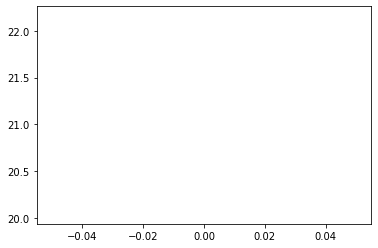

[[0.35704717 0.34683454 0.29611835]
 [0.30573323 0.29687354 0.39739323]
 [0.35529354 0.33138868 0.31331775]]
[1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 0.3, 0.3, 1.0, 0.2, 0.2, 0.2, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3, 1.0, 0.2, 0.3, 0.3, 1.0, 0.2, 0.2, 1.0, 0.3, 0.3, 0.3, 1.0, 0.3, 0.3, 0.2]


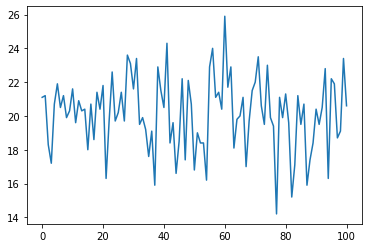

[[0.40195182 0.33672446 0.26132372]
 [0.332975   0.2947703  0.3722548 ]
 [0.39508826 0.32078055 0.28413117]]
[1.0, 1.0, 0.3, 0.3, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 0.3, 0.3, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 0.2, 0.2, 1.0, 0.2, 1.0, 0.3, 0.2, 0.2, 1.0, 0.3, 1.0, 0.2, 0.2, 0.2, 0.3, 0.3, 1.0, 0.2, 1.0, 0.2, 0.2]


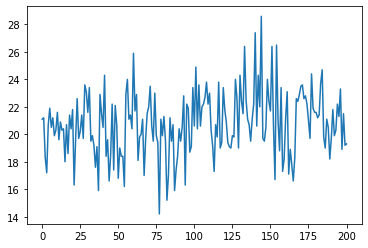

[[0.37293693 0.34788892 0.2791741 ]
 [0.3380025  0.30287164 0.35912588]
 [0.48957938 0.25129256 0.2591281 ]]
[1.0, 0.2, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 1.0]


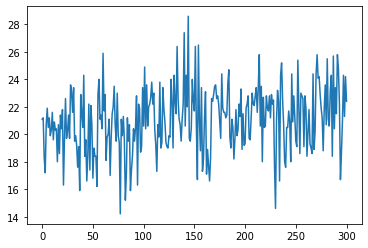

[[0.38763136 0.33328715 0.2790814 ]
 [0.34633735 0.27084327 0.38281947]
 [0.5093535  0.21315186 0.2774946 ]]
[0.2, 0.2, 0.3, 1.0, 0.2, 0.3, 0.3, 0.3, 0.3, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 0.2, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.3, 0.3, 0.2, 0.3, 0.3, 0.3, 1.0, 1.0, 0.3, 0.2, 0.2]


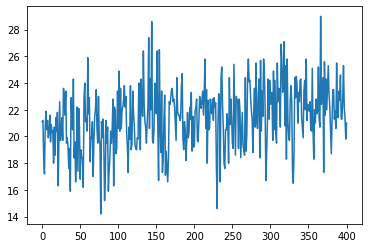

[[0.35859323 0.33939058 0.3020162 ]
 [0.34938774 0.23982373 0.4107885 ]
 [0.52567995 0.20379822 0.27052188]]
[0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 0.2, 0.2, 0.3, 1.0, 0.3, 0.3, 0.3, 1.0]


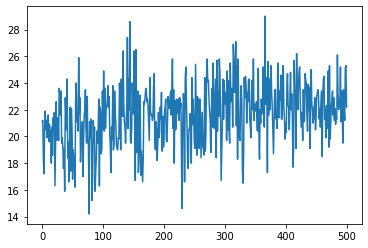

[[0.37959033 0.33084145 0.28956816]
 [0.38124284 0.23424384 0.38451335]
 [0.5542283  0.1885083  0.25726348]]
[0.3, 1.0, 0.3, 0.2, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.2, 0.2]


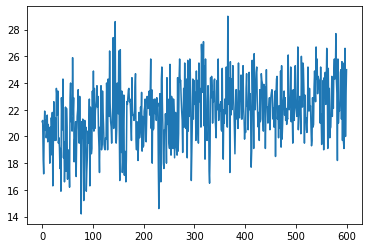

[[0.39407903 0.35203382 0.25388718]
 [0.4084794  0.24968368 0.34183687]
 [0.6022697  0.17649397 0.22123632]]
[1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 0.2, 1.0]


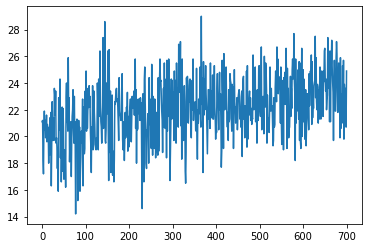

[[0.4650024  0.3284311  0.20656651]
 [0.4579258  0.22478905 0.31728515]
 [0.64521146 0.16019312 0.19459546]]
[0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.2, 1.0]


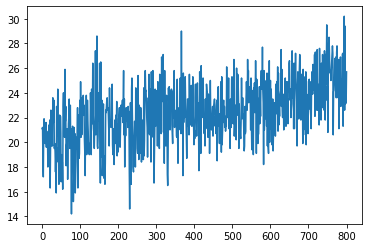

[[0.4264652  0.3628592  0.21067567]
 [0.45944408 0.2192441  0.32131183]
 [0.6253198  0.18372431 0.19095588]]
[0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0]


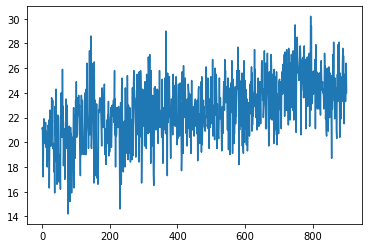

[[0.42201415 0.36073884 0.21724701]
 [0.45347545 0.21071048 0.33581418]
 [0.6105165  0.1797928  0.20969073]]
[0.2, 0.3, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0]


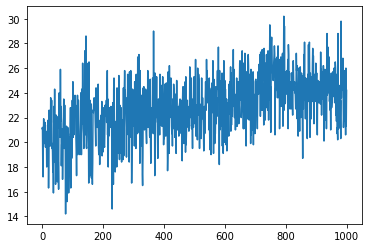

[[0.4369429  0.36120844 0.20184866]
 [0.48207006 0.21226582 0.30566415]
 [0.60081106 0.18246993 0.216719  ]]
[1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 0.3, 1.0, 0.3, 0.2, 0.3, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 0.3, 1.0]


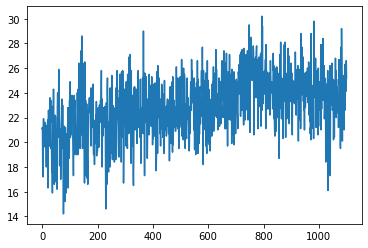

[[0.44823742 0.35555953 0.19620302]
 [0.44633958 0.2286213  0.32503915]
 [0.5929078  0.17854789 0.22854435]]
[0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.3]


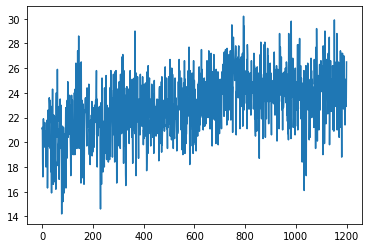

[[0.45433888 0.30322787 0.24243326]
 [0.49401593 0.20650445 0.2994796 ]
 [0.621916   0.15604459 0.22203946]]
[0.3, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 0.2]


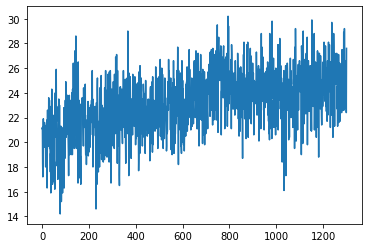

[[0.44914275 0.30528414 0.24557315]
 [0.5116545  0.20920733 0.27913818]
 [0.57993597 0.16802901 0.252035  ]]
[1.0, 0.2, 0.3, 0.3, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 0.3, 0.2, 1.0]


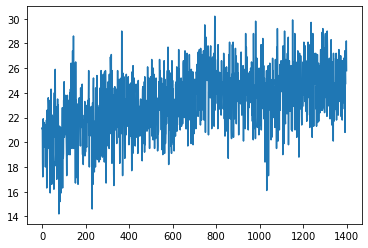

[[0.5172133  0.26612034 0.21666636]
 [0.5080925  0.22375526 0.2681522 ]
 [0.59296286 0.15597247 0.25106475]]
[0.3, 0.3, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0]


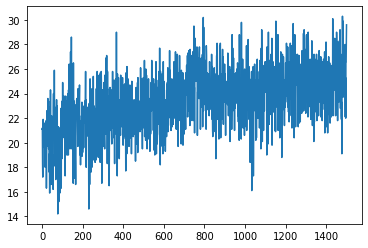

[[0.5318884  0.2079682  0.26014334]
 [0.5622429  0.21114539 0.22661164]
 [0.6081301  0.16123435 0.23063557]]
[1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0]


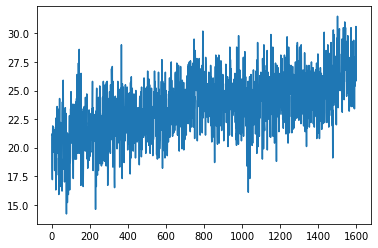

[[0.61844546 0.18085386 0.20070064]
 [0.55324036 0.20620139 0.2405583 ]
 [0.63922536 0.16393127 0.1968434 ]]
[1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 0.2, 1.0, 0.3, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]


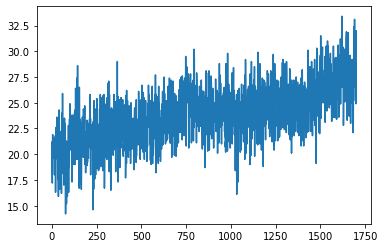

[[0.6395217  0.1521961  0.20828223]
 [0.54121876 0.19814606 0.26063526]
 [0.65724176 0.16709031 0.17566791]]
[0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 0.2]


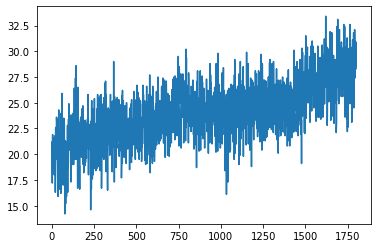

[[0.6210814  0.18858647 0.19033208]
 [0.52019674 0.21127287 0.2685304 ]
 [0.6608569  0.16841964 0.17072353]]
[1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0]


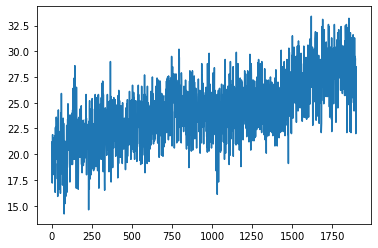

[[0.7050247  0.15050323 0.14447214]
 [0.5275064  0.21368982 0.25880376]
 [0.6996581  0.14510345 0.1552384 ]]
[0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0]


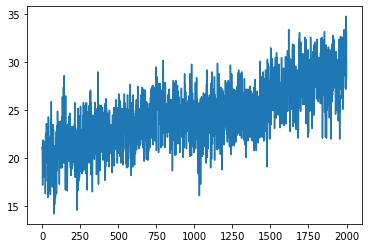

[[0.77947414 0.1262479  0.0942779 ]
 [0.5283371  0.24057    0.2310929 ]
 [0.68329924 0.1497627  0.1669381 ]]
[0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 1.0]


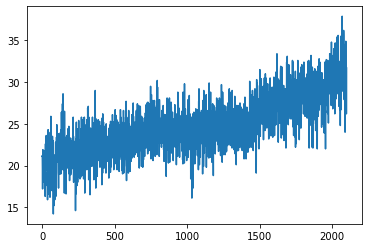

[[0.76772213 0.12889223 0.10338572]
 [0.55969363 0.21544644 0.22485995]
 [0.7252103  0.13233641 0.14245318]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]


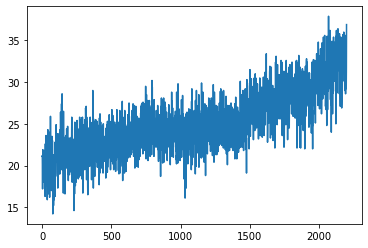

[[0.83821154 0.08748184 0.0743067 ]
 [0.5440663  0.23829664 0.21763706]
 [0.7233303  0.13236168 0.14430797]]
[1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0]


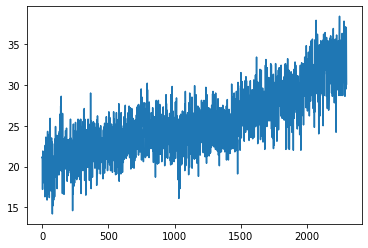

[[0.7761703  0.1190227  0.10480708]
 [0.55502945 0.23798911 0.20698139]
 [0.7163757  0.13135418 0.15227003]]
[0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


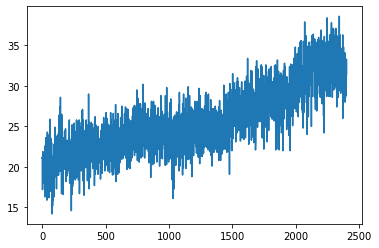

[[0.82276887 0.10612654 0.07110462]
 [0.5817793  0.21592595 0.20229472]
 [0.7125207  0.13349658 0.15398279]]
[0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


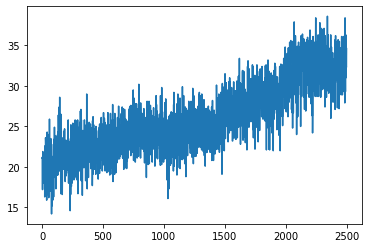

[[0.81824607 0.10564927 0.07610464]
 [0.57840884 0.22705406 0.19453718]
 [0.71043897 0.13249925 0.1570618 ]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 0.2, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0]


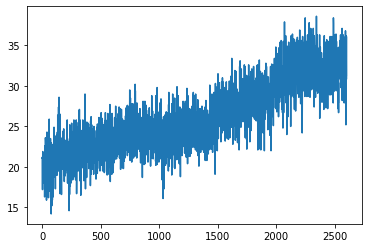

[[0.76736665 0.13407926 0.09855405]
 [0.6141359  0.20273703 0.18312709]
 [0.6932089  0.14023334 0.16655776]]
[1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0]


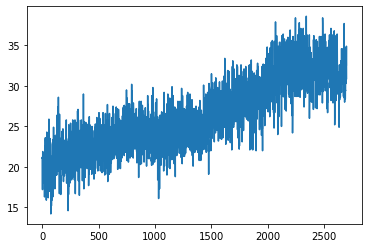

[[0.74847853 0.14035484 0.11116659]
 [0.6364429  0.19536094 0.1681962 ]
 [0.6919515  0.14929247 0.15875594]]
[1.0, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.3, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0]


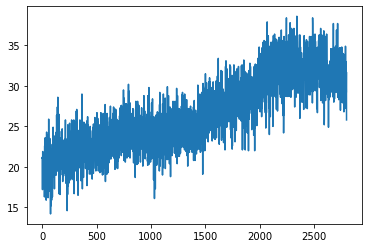

[[0.75923085 0.11876976 0.1219994 ]
 [0.6837613  0.17348897 0.14274973]
 [0.7001849  0.15303579 0.14677928]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0]


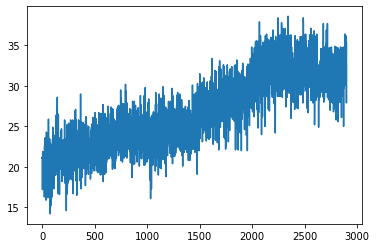

[[0.7459308  0.15153727 0.1025319 ]
 [0.6927381  0.15736416 0.14989775]
 [0.6950654  0.16152385 0.14341068]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0]


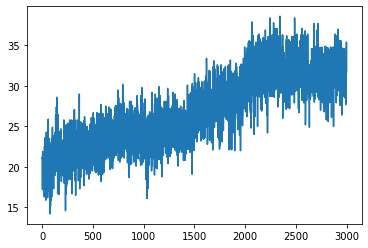

[[0.7443376  0.14559163 0.11007077]
 [0.71675736 0.15032691 0.13291569]
 [0.6605845  0.17400157 0.16541398]]
[0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 0.3]


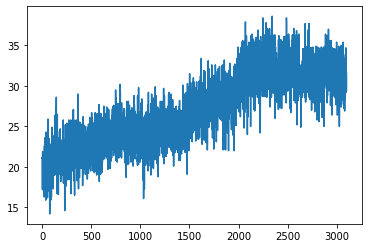

[[0.7507062  0.14832142 0.10097242]
 [0.6739986  0.18812725 0.13787411]
 [0.6983739  0.15091304 0.15071294]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 0.3, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.3]


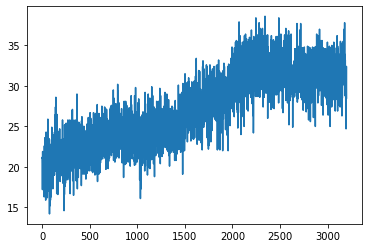

[[0.8259743  0.10029321 0.0737326 ]
 [0.67729294 0.18173873 0.14096831]
 [0.74191886 0.13128337 0.1267977 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0]


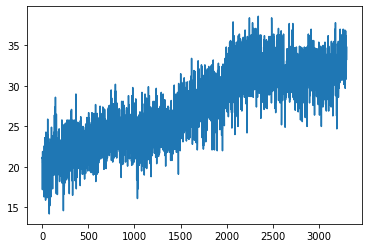

[[0.8139256  0.11200275 0.07407164]
 [0.6587258  0.19255279 0.14872149]
 [0.7576746  0.11421874 0.12810661]]
[1.0, 1.0, 0.2, 0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]


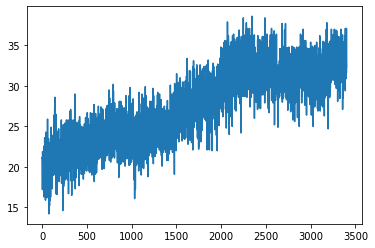

[[0.8624695  0.07791305 0.05961747]
 [0.670785   0.17743103 0.15178391]
 [0.7579847  0.11851494 0.12350038]]
[0.2, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


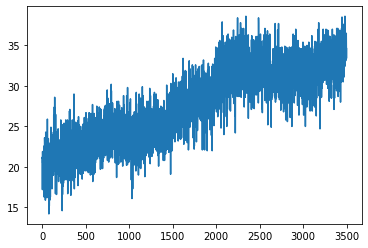

[[0.9019835  0.05208591 0.04593064]
 [0.6488523  0.19672461 0.1544231 ]
 [0.7621471  0.11688907 0.12096385]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


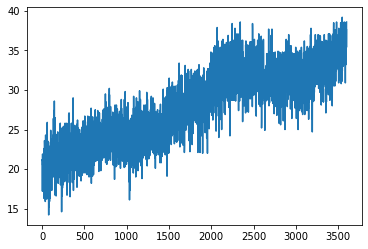

[[0.9064979  0.04951997 0.04398214]
 [0.61418074 0.2134021  0.1724172 ]
 [0.7373754  0.12337241 0.13925225]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


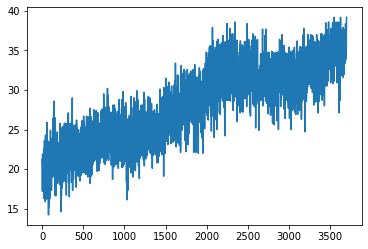

[[0.9282202  0.04069613 0.03108371]
 [0.6216892  0.2100497  0.16826111]
 [0.74160296 0.12291306 0.13548398]]
[0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0]


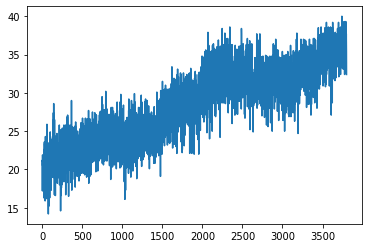

[[0.9324732  0.03438259 0.03314424]
 [0.64105743 0.19427948 0.164663  ]
 [0.75235856 0.12035148 0.12728995]]
[1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 1.0, 1.0, 0.2, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


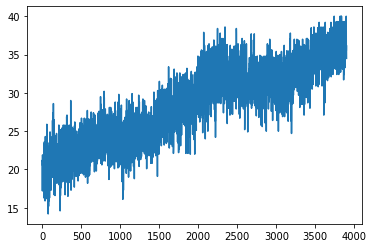

[[0.9318526  0.0363444  0.03180298]
 [0.6453111  0.1987963  0.15589246]
 [0.7394682  0.12370951 0.13682225]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


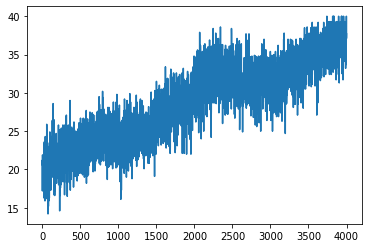

[[0.9123321  0.04007706 0.04759081]
 [0.6425523  0.18566808 0.17177956]
 [0.7298087  0.12760282 0.14258847]]
[0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2]


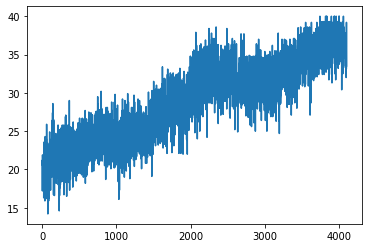

[[0.9141005  0.03417774 0.05172173]
 [0.64424014 0.18642563 0.16933422]
 [0.72726965 0.13198008 0.14075032]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0]


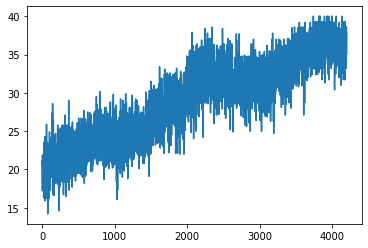

[[0.9332419  0.028463   0.03829511]
 [0.5861925  0.22043481 0.19337265]
 [0.74009466 0.12837669 0.13152872]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


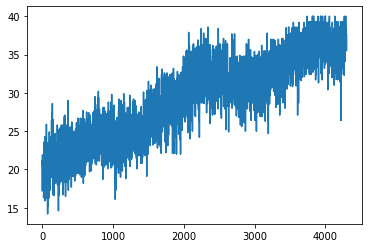

[[0.9282738  0.03125798 0.04046816]
 [0.5722954  0.22250503 0.2051996 ]
 [0.7258124  0.13252689 0.14166074]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


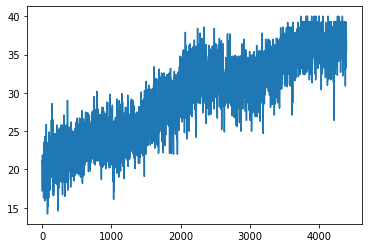

[[0.9272663  0.03303142 0.03970236]
 [0.59245217 0.21051086 0.19703694]
 [0.74208575 0.11970097 0.13821328]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


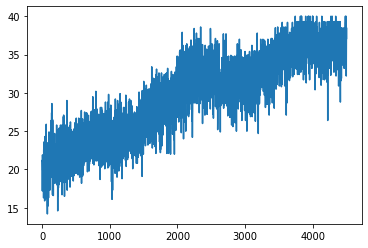

[[0.92782843 0.02782144 0.04435011]
 [0.56575805 0.22580615 0.20843586]
 [0.74130416 0.1084448  0.15025108]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


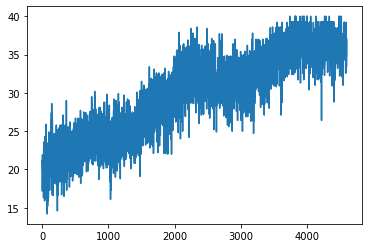

[[0.9316084  0.02651585 0.0418758 ]
 [0.58664334 0.2131004  0.20025624]
 [0.7283509  0.11117065 0.16047838]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


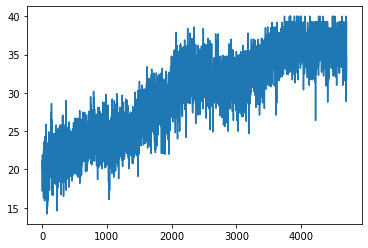

[[0.9574661  0.0181131  0.02442069]
 [0.5940654  0.20770073 0.1982338 ]
 [0.7293309  0.1058472  0.16482192]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


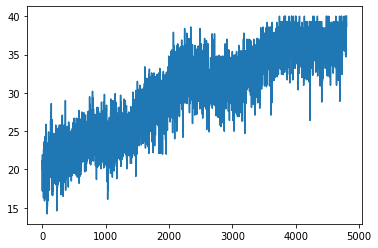

[[0.9541846  0.01892216 0.02689329]
 [0.59652215 0.208331   0.19514681]
 [0.7360996  0.09986719 0.1640332 ]]
[0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


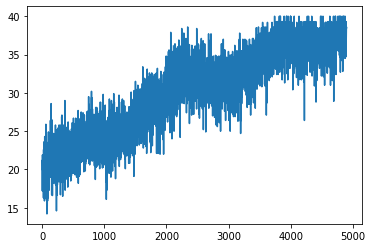

[[0.9562213  0.0162736  0.02750507]
 [0.6041386  0.21255389 0.18330751]
 [0.7405326  0.09932104 0.16014636]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0]


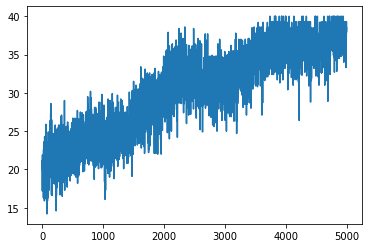

[[0.9598235  0.01483307 0.02534347]
 [0.6066376  0.2123628  0.18099953]
 [0.7451671  0.09347042 0.16136257]]
[0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


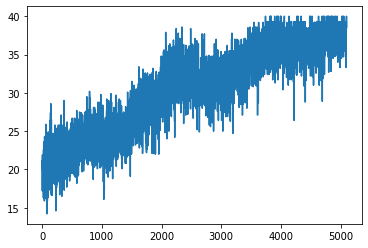

[[0.9620451  0.01443849 0.02351639]
 [0.6161294  0.21130924 0.17256129]
 [0.75869477 0.08962044 0.1516848 ]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


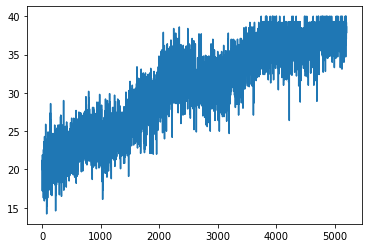

[[0.9660026  0.01316763 0.02082971]
 [0.61690134 0.20710552 0.17599317]
 [0.7753656  0.08148019 0.14315417]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


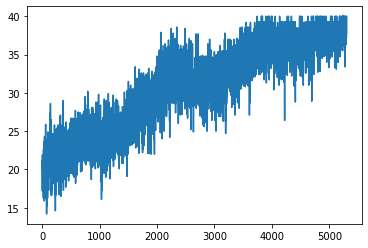

[[0.96908945 0.01134471 0.01956579]
 [0.5984548  0.20757255 0.19397265]
 [0.7879875  0.07938086 0.13263169]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


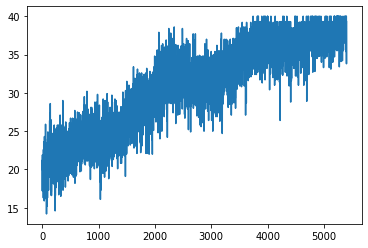

[[0.97352797 0.01006649 0.01640557]
 [0.58667094 0.2168857  0.1964434 ]
 [0.7653809  0.08720043 0.14741866]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


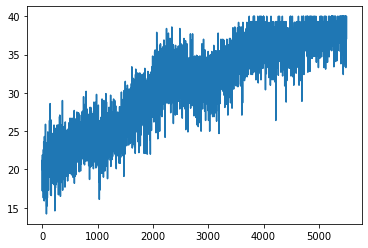

[[0.9727807  0.010518   0.01670128]
 [0.58392924 0.21292987 0.20314091]
 [0.76845735 0.08478931 0.14675339]]
[0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0]


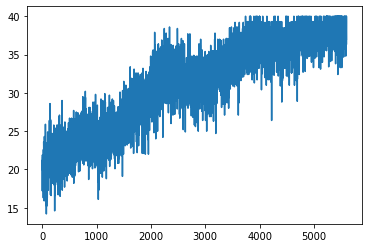

[[0.97764856 0.00920548 0.01314594]
 [0.5884886  0.20172204 0.2097894 ]
 [0.77547824 0.08443235 0.14008942]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


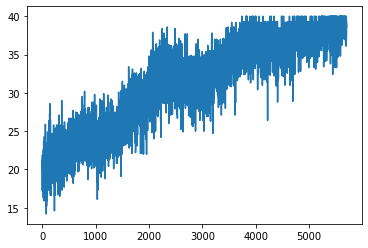

[[0.9745206  0.01001013 0.01546918]
 [0.5922251  0.20718592 0.2005889 ]
 [0.79153836 0.07931673 0.12914489]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


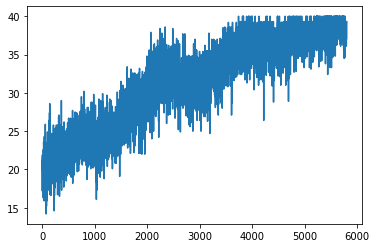

[[0.97661716 0.00886119 0.01452169]
 [0.59981036 0.20174567 0.198444  ]
 [0.7918918  0.07672755 0.13138074]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


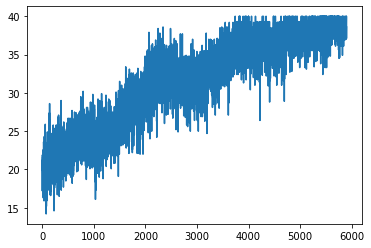

[[0.97819114 0.00841162 0.0133973 ]
 [0.63471407 0.18529549 0.17999049]
 [0.7963947  0.07545584 0.12814942]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


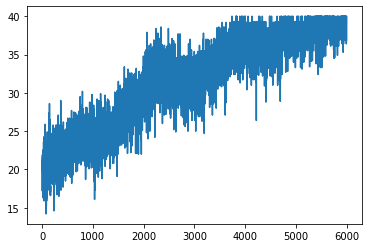

[[0.9763306  0.00914446 0.014525  ]
 [0.65746313 0.17153834 0.17099844]
 [0.8059754  0.07094356 0.12308101]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


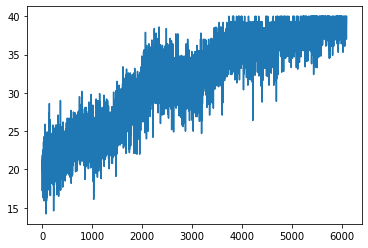

[[0.9764814  0.00930658 0.01421194]
 [0.6688514  0.16268839 0.16846026]
 [0.8020602  0.07247252 0.12546718]]
[0.3, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


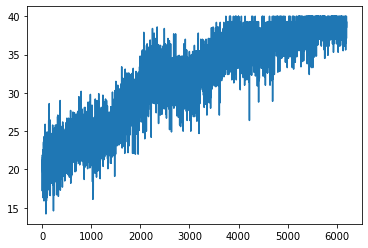

[[0.9778315  0.00907571 0.01309278]
 [0.6693181  0.15950254 0.17117937]
 [0.80331564 0.07191617 0.12476822]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


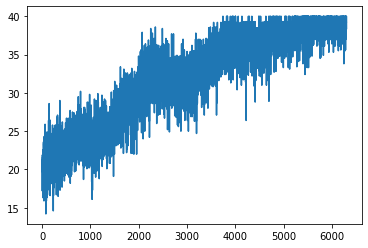

[[0.9782025  0.00851976 0.01327768]
 [0.690614   0.1490996  0.16028641]
 [0.8184538  0.06959181 0.11195436]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


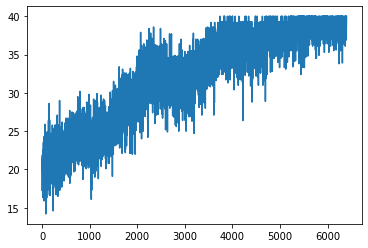

[[0.9787548  0.00821907 0.0130261 ]
 [0.69285095 0.14674722 0.16040187]
 [0.81253564 0.07049677 0.1169676 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


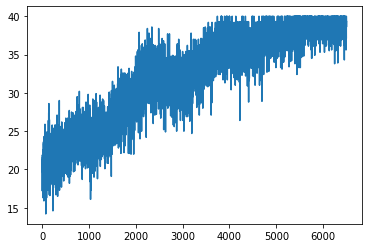

[[0.9773152  0.00864566 0.01403918]
 [0.70273095 0.14321348 0.15405554]
 [0.8068927  0.07173176 0.1213756 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


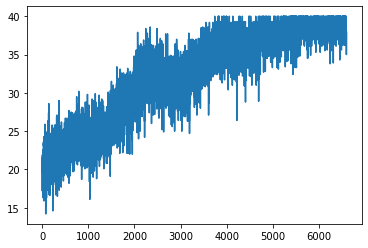

[[0.9770939  0.00888104 0.01402512]
 [0.684945   0.15391867 0.16113639]
 [0.80490625 0.06998093 0.12511289]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0]


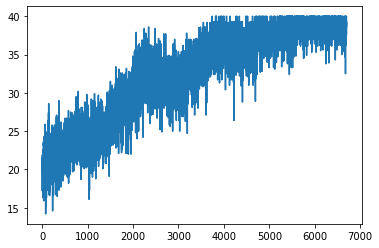

[[0.97839695 0.00821005 0.013393  ]
 [0.6820425  0.15229638 0.16566111]
 [0.80521476 0.0705275  0.12425776]]
[0.2, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


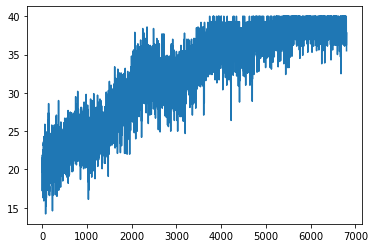

[[0.97773814 0.00875628 0.01350566]
 [0.6775462  0.15520625 0.16724755]
 [0.80153424 0.07189851 0.12656718]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


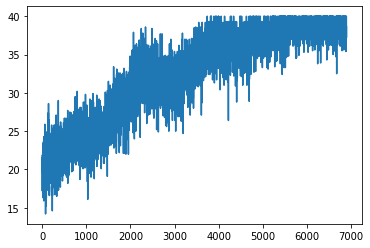

[[0.97851485 0.00798032 0.01350477]
 [0.6793613  0.1541952  0.16644348]
 [0.81415075 0.06582572 0.12002354]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


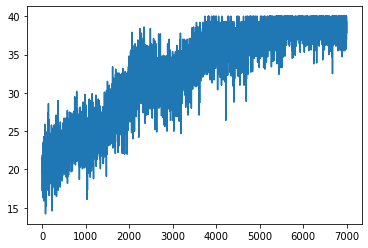

[[0.9781315  0.00795463 0.0139139 ]
 [0.6736432  0.1600643  0.16629258]
 [0.82190305 0.06385463 0.11424233]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


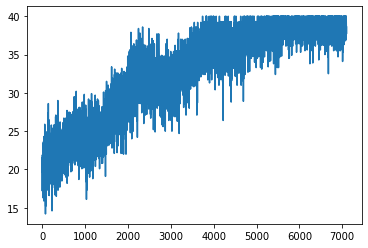

[[0.9782355  0.0083724  0.0133922 ]
 [0.64289886 0.17330295 0.1837982 ]
 [0.8213839  0.06346377 0.11515234]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


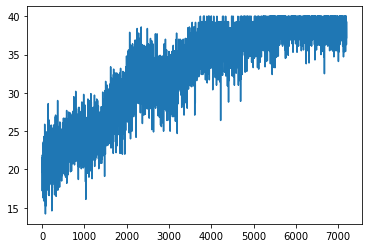

[[0.98192763 0.00678848 0.01128382]
 [0.6427459  0.17583634 0.18141775]
 [0.81195104 0.06474657 0.1233024 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0]


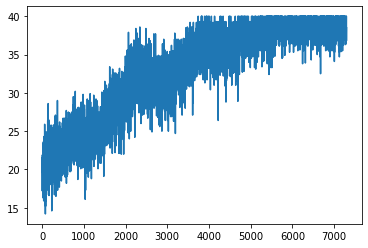

[[0.98347455 0.0062181  0.0103073 ]
 [0.6488044  0.17174838 0.17944716]
 [0.8040314  0.06750554 0.12846307]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


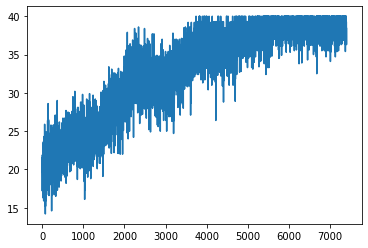

[[0.9808595  0.00686314 0.01227727]
 [0.64648646 0.16799425 0.18551931]
 [0.800439   0.06915855 0.1304025 ]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


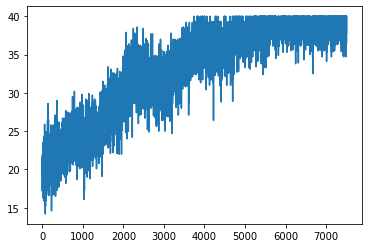

[[0.9812516  0.00635072 0.01239766]
 [0.6476667  0.16769245 0.18464087]
 [0.8065924  0.06913827 0.12426928]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


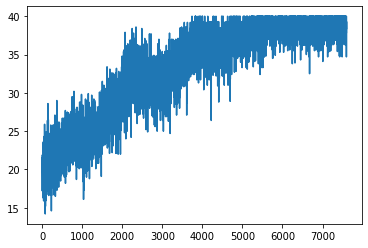

[[0.9780281  0.00695394 0.0150179 ]
 [0.66376734 0.16066656 0.17556609]
 [0.8092506  0.06943412 0.12131529]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


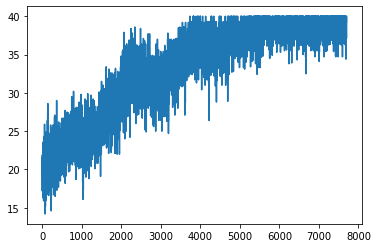

[[0.98045236 0.00649827 0.01304939]
 [0.6883593  0.14657612 0.16506459]
 [0.8139245  0.06765207 0.11842342]]
[1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


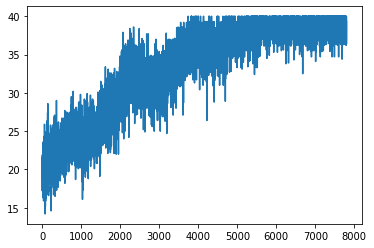

[[0.9826637  0.00556178 0.01177443]
 [0.6944812  0.14721864 0.15830013]
 [0.8055064  0.07270831 0.12178527]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


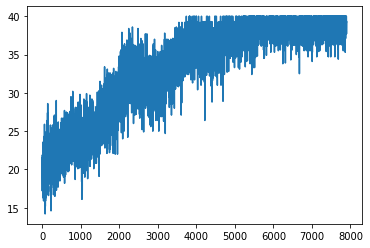

[[0.9839246  0.00520119 0.01087413]
 [0.7087963  0.14120565 0.14999802]
 [0.8088425  0.07230671 0.11885079]]
[0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


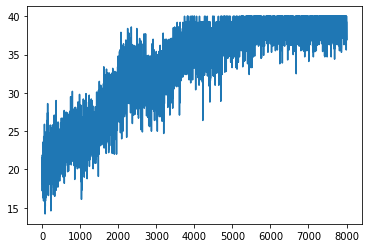

[[0.9834246  0.00529547 0.01127998]
 [0.7239805  0.13374819 0.14227131]
 [0.80908704 0.07211936 0.11879363]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


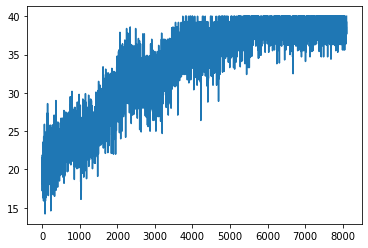

[[0.982939   0.00509954 0.01196136]
 [0.7132259  0.13559395 0.15118022]
 [0.8014382  0.07581286 0.12274889]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


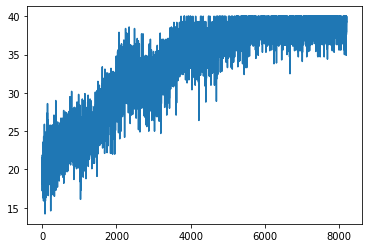

[[0.9842998  0.00472937 0.01097086]
 [0.71071297 0.13769501 0.15159199]
 [0.8035777  0.07477786 0.12164441]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


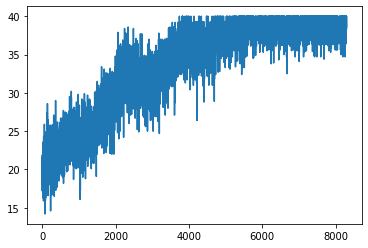

[[0.98467904 0.00471903 0.01060189]
 [0.7035944  0.14439048 0.15201521]
 [0.8049445  0.07330374 0.12175171]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


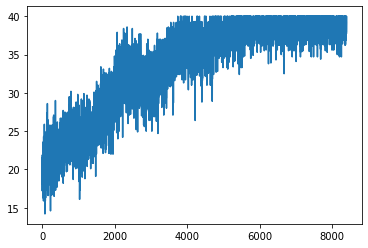

[[0.98205477 0.00484969 0.01309549]
 [0.7122594  0.13720773 0.15053287]
 [0.8048506  0.0717596  0.12338983]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


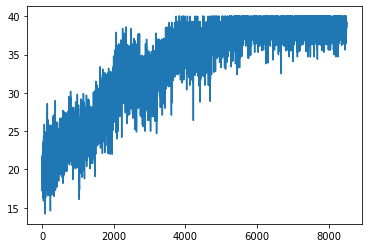

[[0.97817594 0.00522472 0.01659938]
 [0.71432126 0.13560338 0.15007533]
 [0.8024598  0.07043257 0.12710764]]
[1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


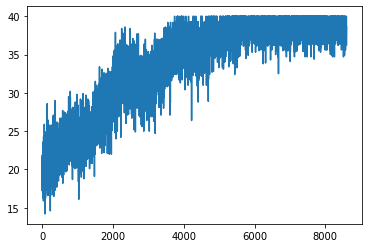

[[0.98153037 0.00469973 0.01376995]
 [0.7189303  0.1339844  0.14708534]
 [0.81791264 0.06451549 0.11757185]]
[0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


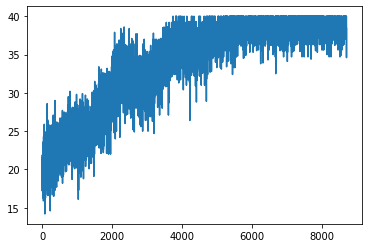

[[0.9821867  0.00463998 0.01317329]
 [0.7257283  0.13401194 0.14025986]
 [0.8143518  0.06475197 0.12089613]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


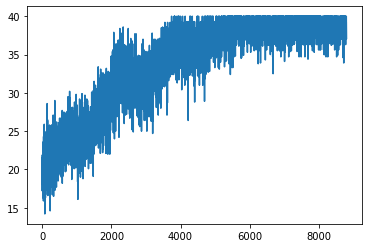

[[0.98332316 0.00424197 0.01243482]
 [0.73887575 0.12775949 0.13336472]
 [0.81375325 0.06334075 0.12290598]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


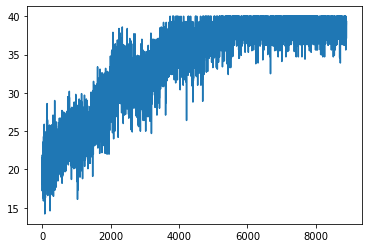

[[0.98399127 0.00403536 0.01197334]
 [0.7382401  0.12682636 0.1349335 ]
 [0.81338716 0.06380308 0.12280971]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


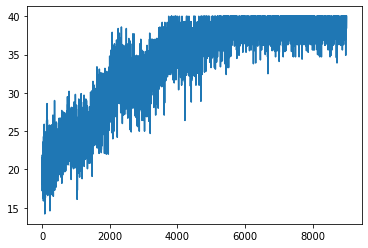

[[0.984521   0.00373514 0.0117439 ]
 [0.73976004 0.12735628 0.13288368]
 [0.8052375  0.06666701 0.1280955 ]]
[0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


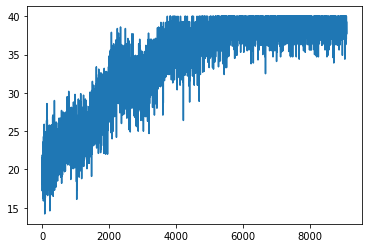

[[0.9867863  0.00324378 0.00996998]
 [0.7419968  0.12590322 0.13209997]
 [0.8141383  0.06524874 0.12061297]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


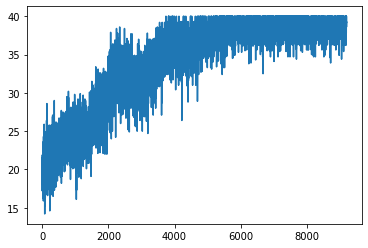

[[0.9880117  0.00288202 0.00910628]
 [0.73959404 0.12823716 0.1321688 ]
 [0.814997   0.06649915 0.11850382]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


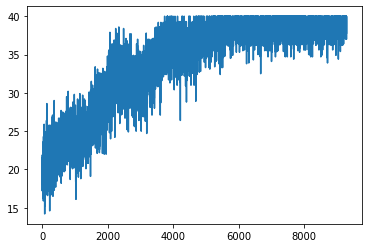

[[0.987433   0.00305645 0.00951044]
 [0.7463683  0.12409434 0.12953734]
 [0.81026554 0.06895704 0.12077744]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


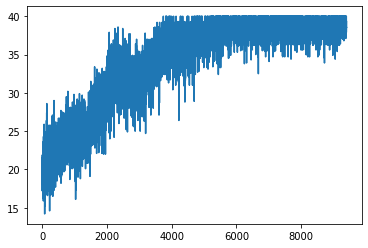

[[0.98824906 0.00291805 0.00883294]
 [0.7455859  0.12266023 0.13175379]
 [0.80665284 0.07109792 0.12224921]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3]


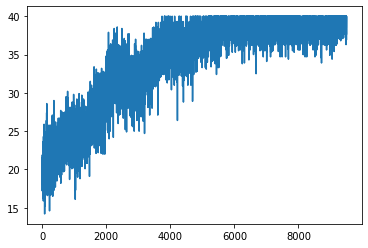

[[0.9892398  0.00290263 0.00785761]
 [0.7391021  0.12950988 0.13138798]
 [0.8072733  0.07184544 0.12088119]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


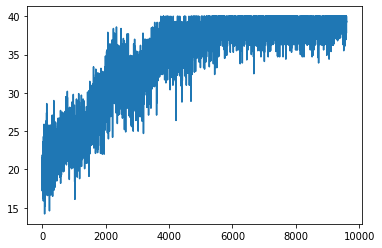

[[0.9883681  0.00301931 0.00861258]
 [0.7406307  0.12836054 0.13100883]
 [0.8038275  0.07404614 0.12212635]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0]


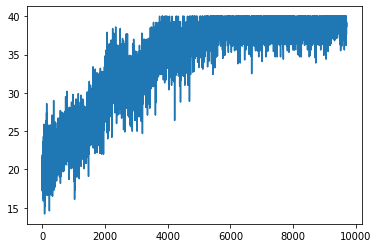

[[0.98920643 0.00307046 0.00772314]
 [0.7590878  0.11789595 0.12301629]
 [0.8080185  0.07297413 0.11900737]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0]


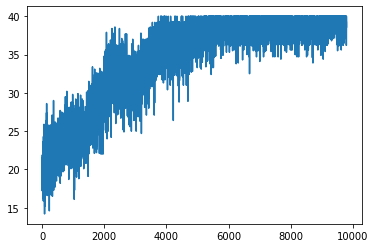

[[0.98899686 0.0031955  0.00780767]
 [0.76245445 0.11595359 0.12159193]
 [0.8215339  0.06735022 0.1111159 ]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


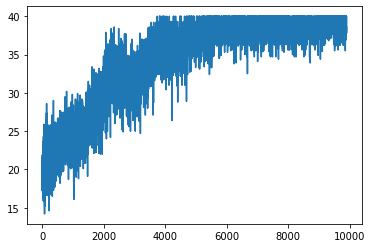

[[0.98862016 0.00320305 0.00817689]
 [0.7589871  0.11507118 0.12594163]
 [0.8319191  0.06424095 0.10383989]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


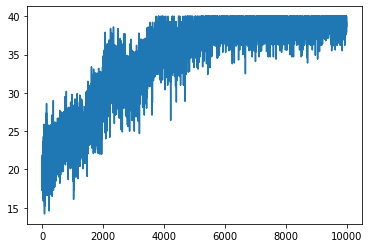

In [30]:
%matplotlib inline
from lxmls.reinforcement_learning.score_function_estimator import train
train()

# Exercise 6.5: Policy Gradient for the CartPole task

Implement policy gradient for the cartpole task by coding the forward pass of Model() in lxmls/reinforcement\_learning/policy\_gradient.py. Check that it is correct by calling the train() function.

env.action_space Discrete(2)
env.observation_space Box(4,)
env.observation_space.high [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


/Users/zmarinho/Work/Priberam/LxMLS19/lxmls-toolkit/venv3/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/zmarinho/Work/Priberam/LxMLS19/lxmls-toolkit/venv3/lib/python3.7/site-packages/LxMLS_Toolkit-0.0.2-py3.7.egg/lxmls/reinforcement_learning/policy_gradient.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))


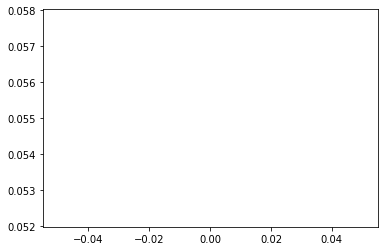

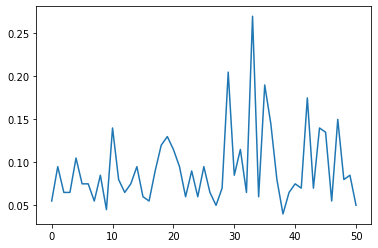

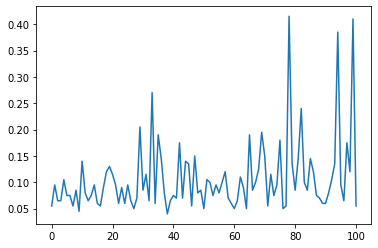

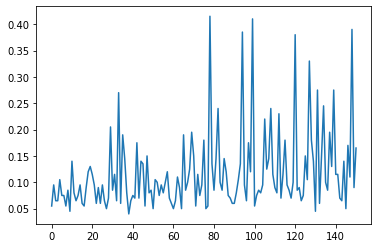

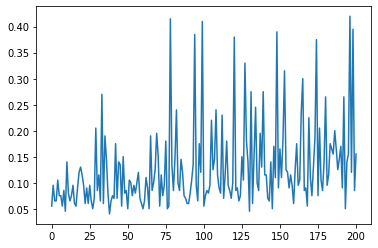

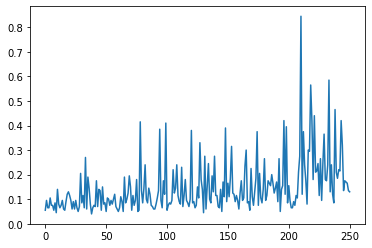

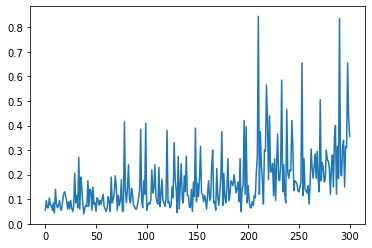

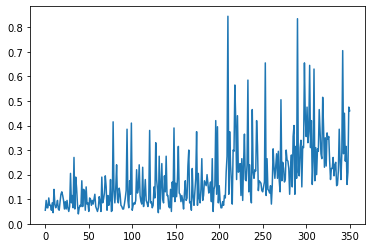

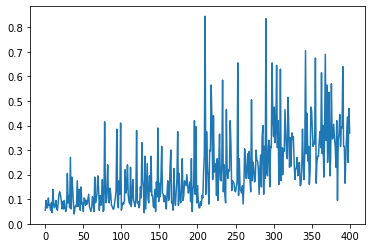

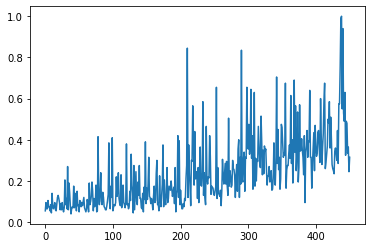

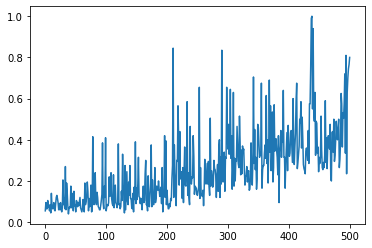

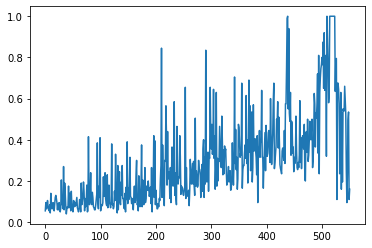

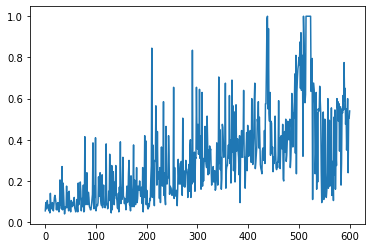

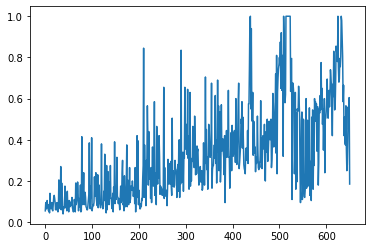

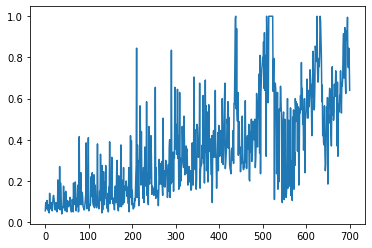

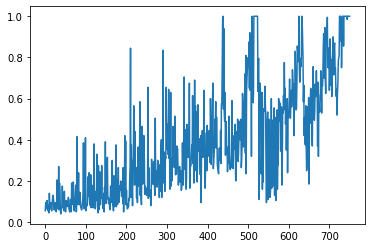

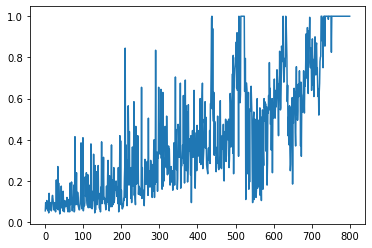

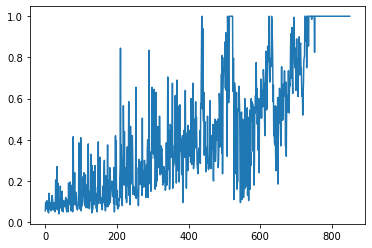

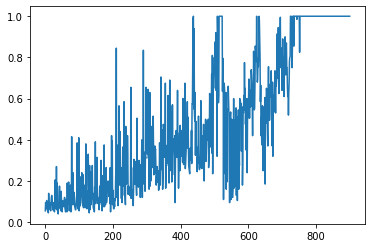

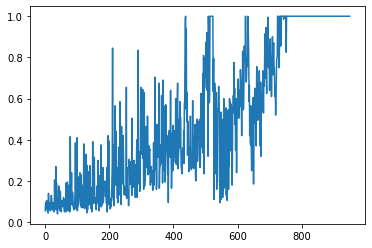

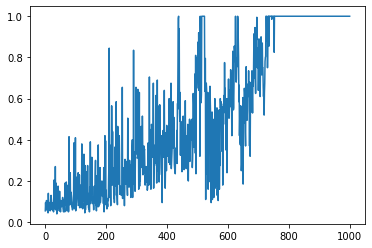

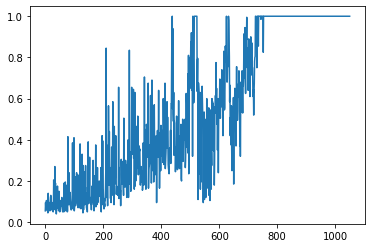

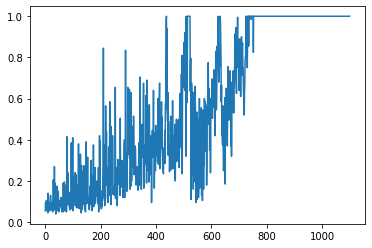

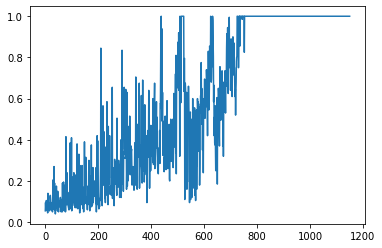

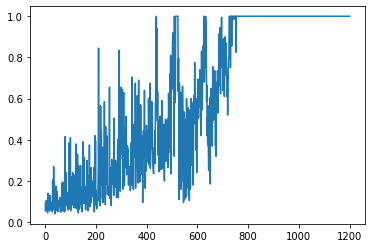

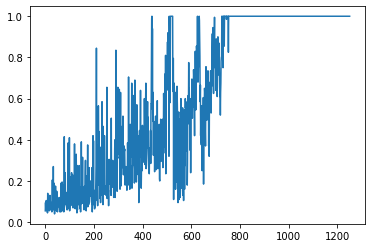

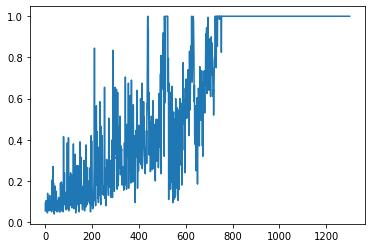

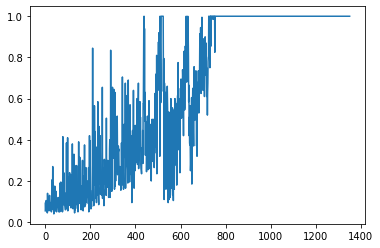

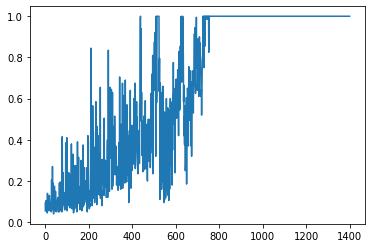

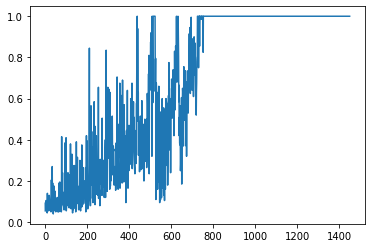

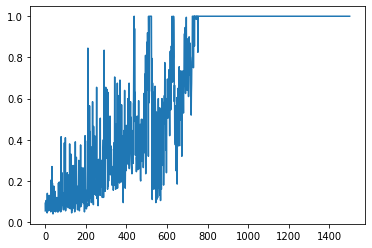

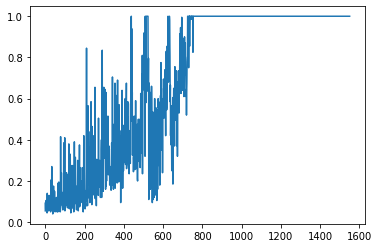

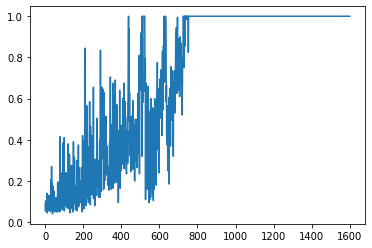

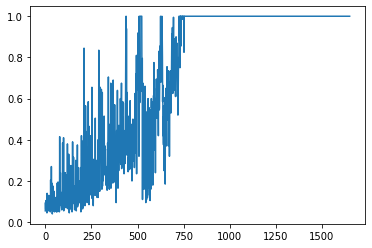

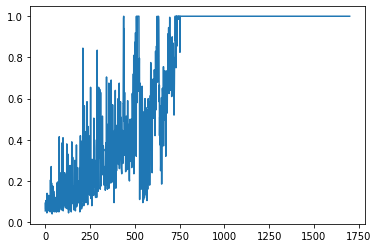

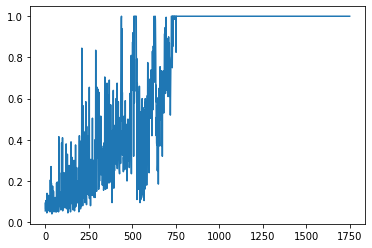

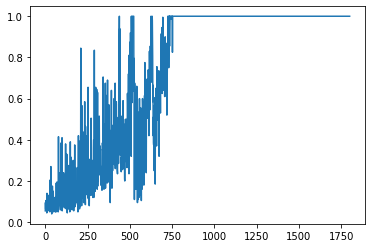

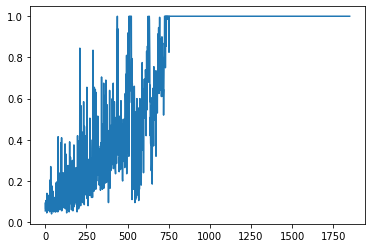

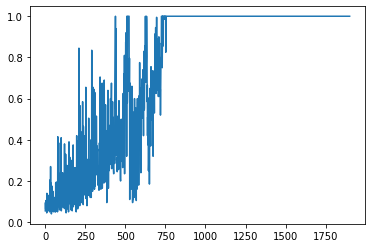

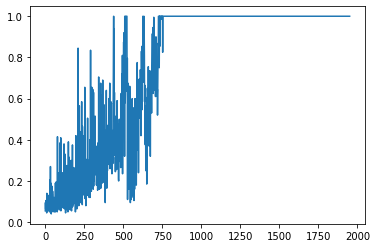

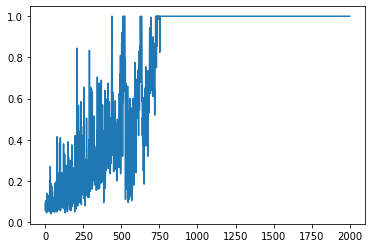

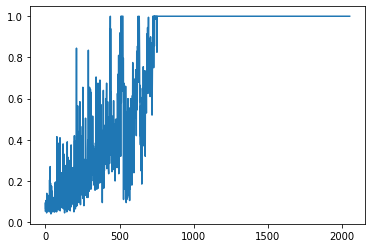

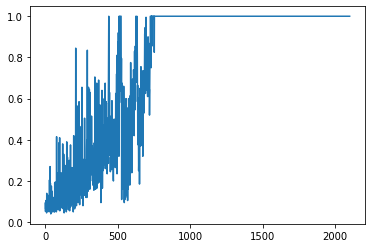

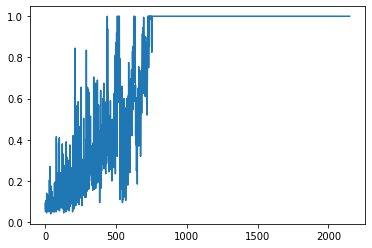

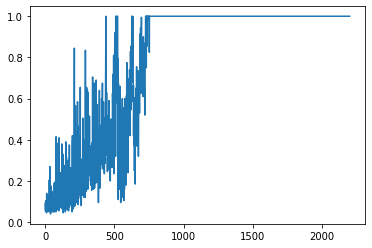

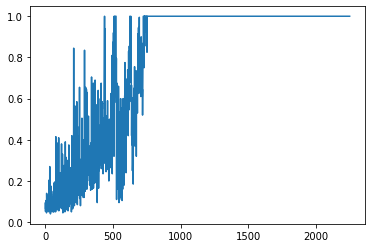

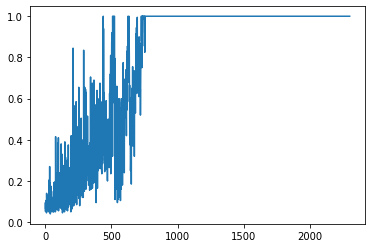

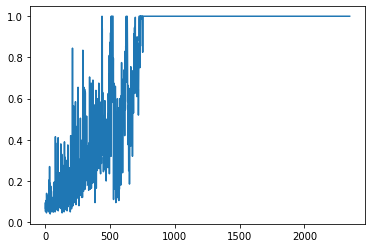

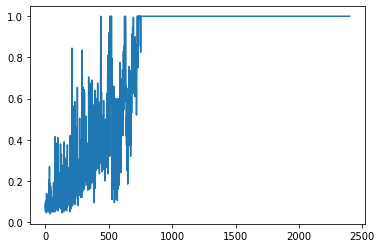

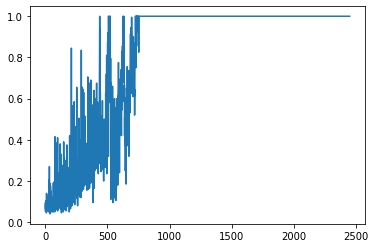

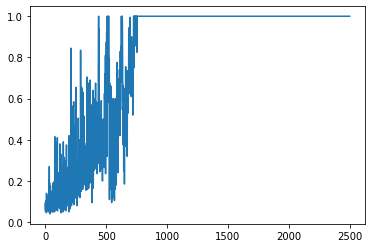

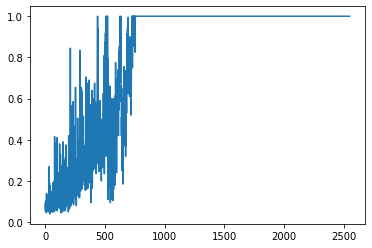

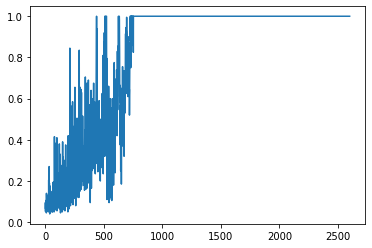

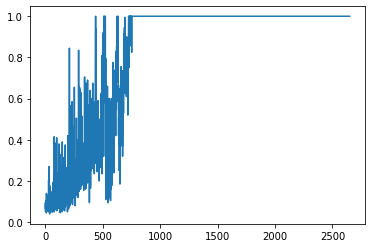

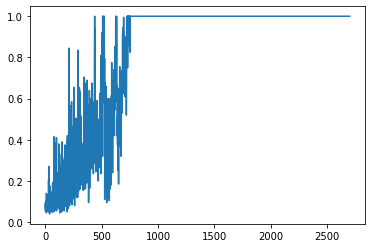

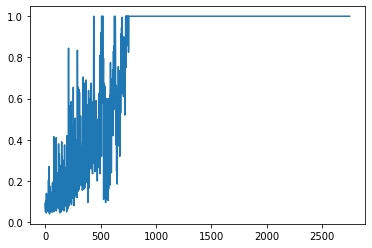

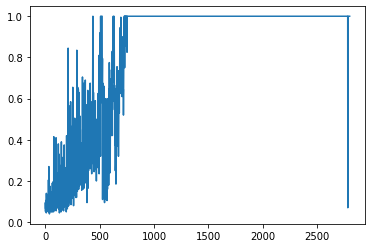

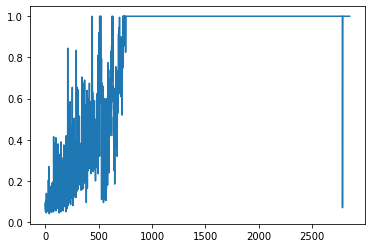

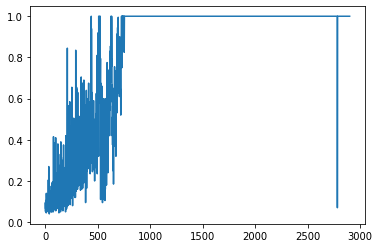

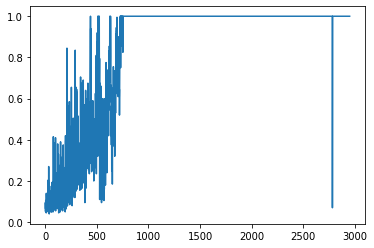

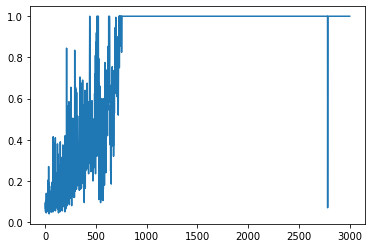

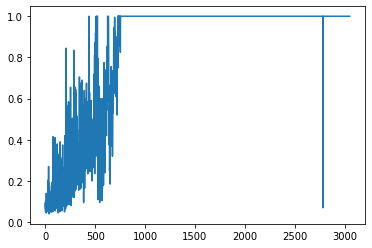

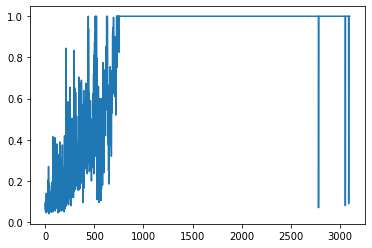

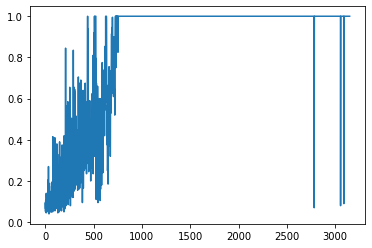

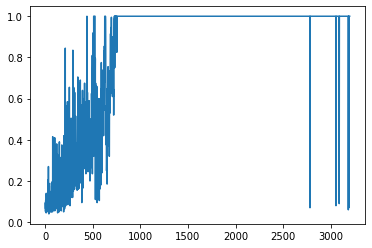

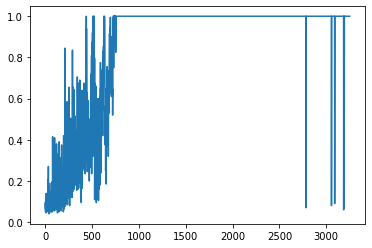

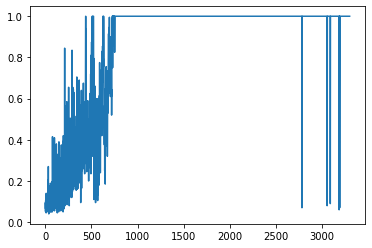

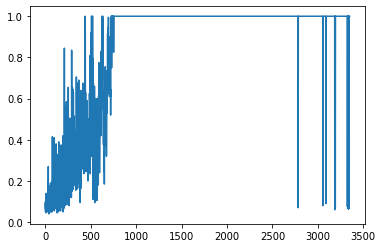

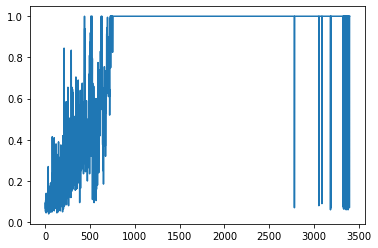

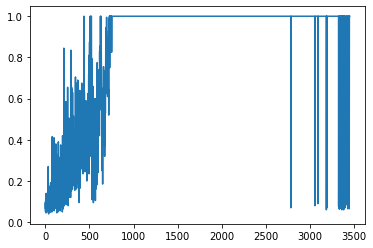

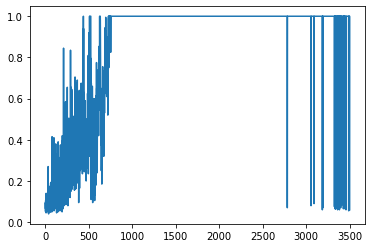

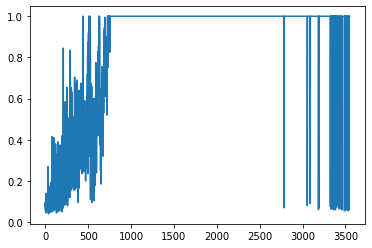

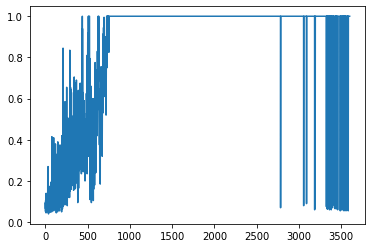

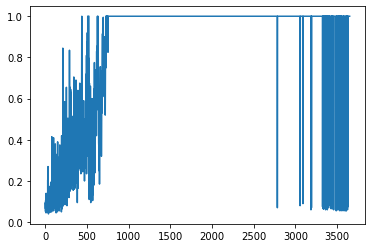

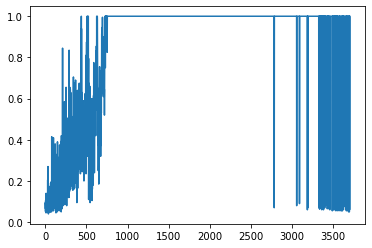

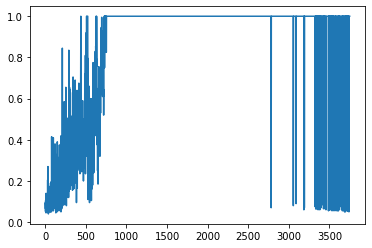

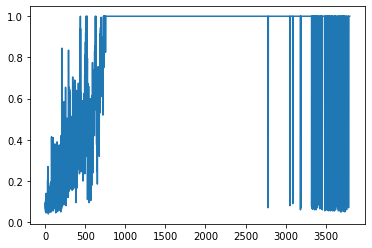

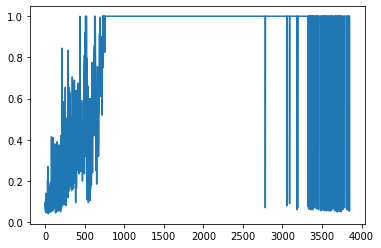

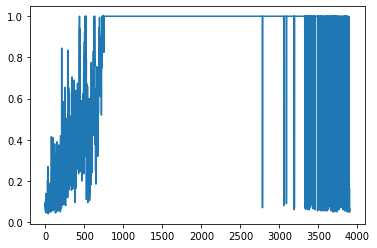

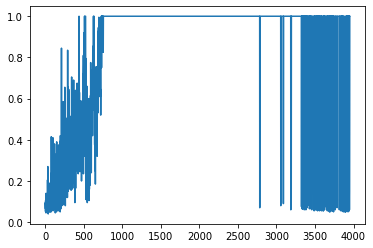

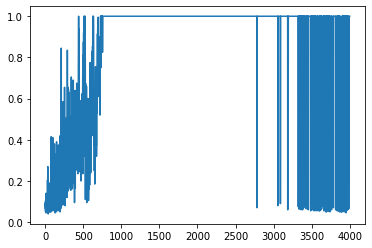

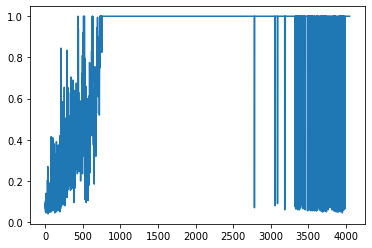

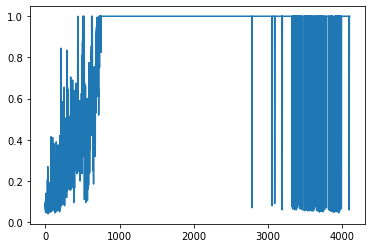

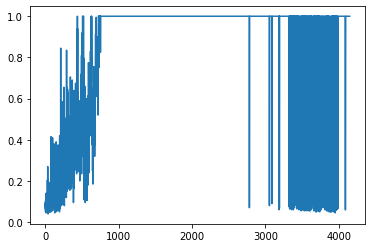

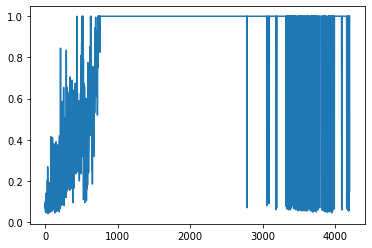

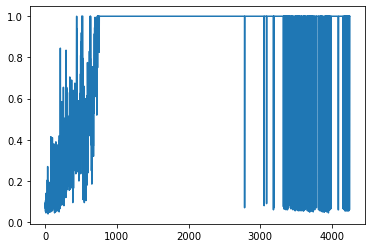

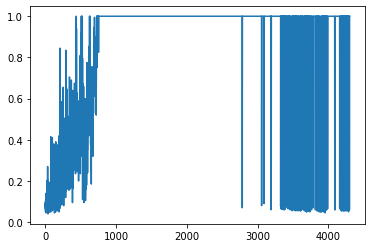

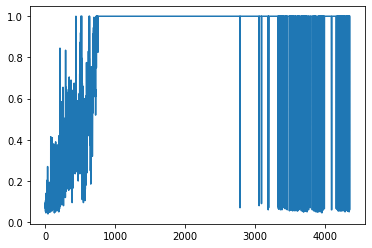

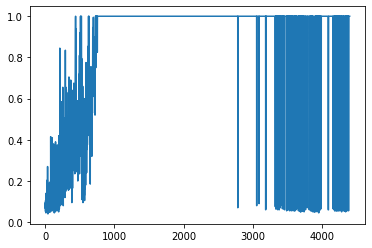

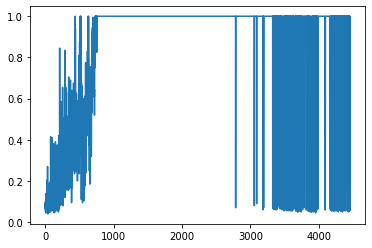

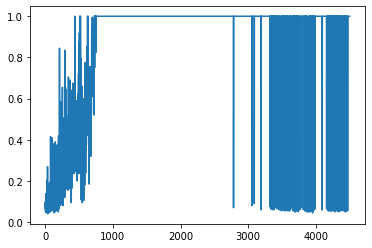

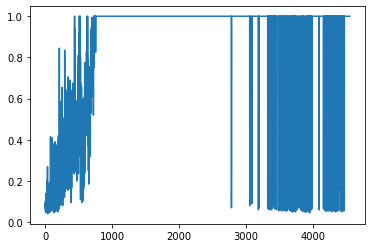

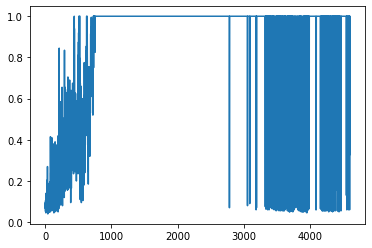

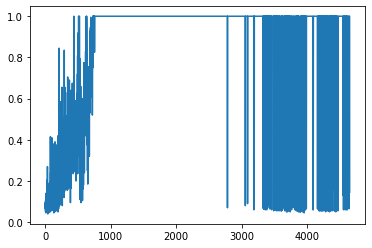

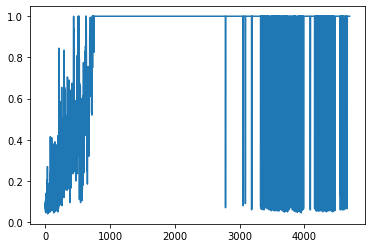

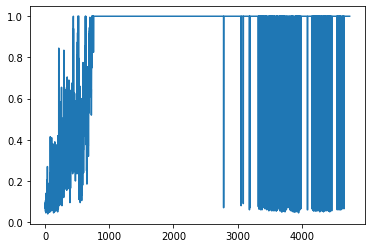

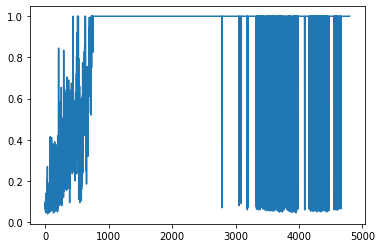

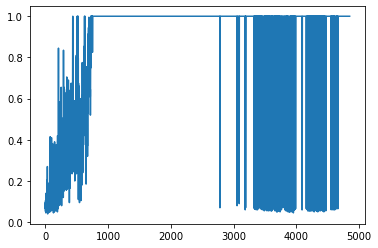

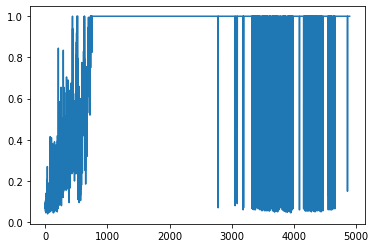

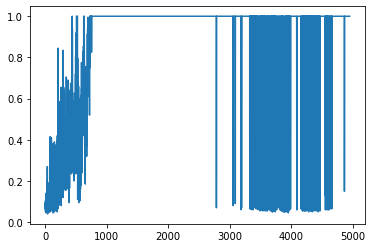

In [31]:
from lxmls.reinforcement_learning.policy_gradient import train
train()

# Extra: Actor Critic for the CartPole task
Implement actor crtitic for the cartpole task by coding the critic forward pass in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

In [ ]:
from lxmls.reinforcement_learning.actor_critic import train
train()

# Exercise 6.6: Policy RNN for Part-of-Speech Tagging



As a last exercise, apply what you have learned to the RNN model seen in previous days. Implement REINFORCE to replace the maximum likelihood loss used on the RNN day. For this you can modify the PolicyRNN class in lxmls/deep learning/pytorch\_models/rnn.py
You can test your implementation by running the file lxmls/reinforcement_learning/RNN_Reinforce.py.